In [1]:
from qiskit import *

In [2]:
qr = QuantumRegister(2)

In [3]:
cr = ClassicalRegister(2)

In [4]:
circuit = QuantumCircuit(qr,cr)

In [5]:
%matplotlib inline

In [6]:
 circuit.draw(initial_state=True)

q0_0: |0>
         
q0_1: |0>
         
 c0: 0 2/

In [7]:
circuit.h(qr[0])

C:\Users\harpr\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


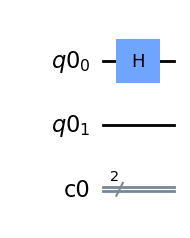

In [8]:
circuit.draw(output = 'mpl')

In [9]:
circuit.cx(qr[0], qr[1])

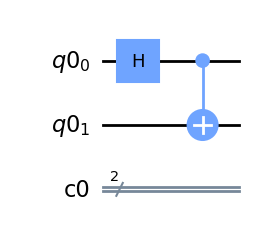

In [10]:
circuit.draw(output = 'mpl')

In [11]:
circuit.measure(qr, cr)

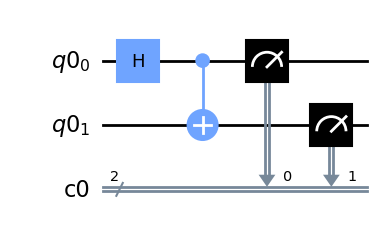

In [12]:
circuit.draw(output = 'mpl')

In [13]:
simulator= Aer.get_backend('qasm_simulator')

In [14]:
execute(circuit, backend = simulator)

In [15]:
result = execute(circuit, backend = simulator).result()

In [16]:
from qiskit.tools.visualization import plot_histogram

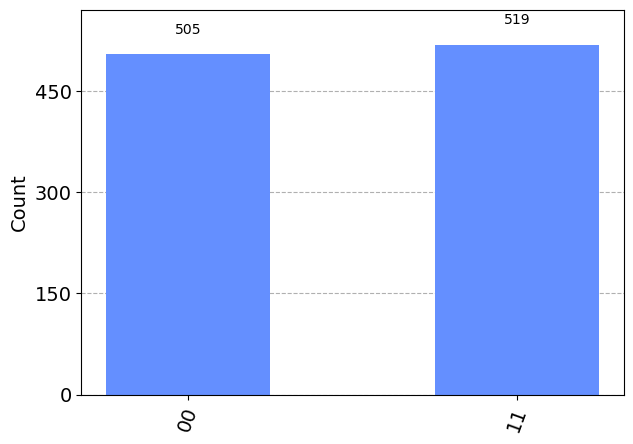

In [17]:
plot_histogram(result.get_counts(circuit))

In [18]:
from qiskit import IBMQ

In [19]:
IBMQ.load_account()

C:\Users\harpr\AppData\Local\Temp\ipykernel_18496\485379158.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\Users\harpr\AppData\Local\Temp\ipykernel_18496\485379158.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [20]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [21]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [22]:
qcomp = provider.get_backend('ibm_brisbane')

In [25]:
job = execute(circuit, backend=qcomp)

In [26]:
from qiskit.tools.monitor import job_monitor

In [27]:
job_monitor(job)

Job Status: job has successfully run


In [28]:
result = job.result()

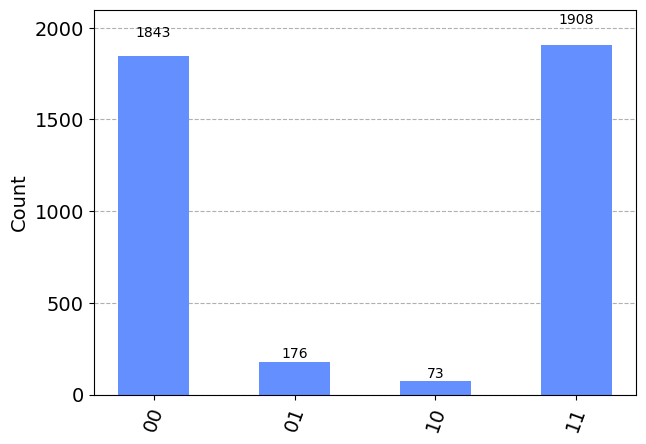

In [31]:
plot_histogram(result.get_counts(circuit))